Loading saved data for alpha1...
1000
Loading saved data for alpha2...
1000
Loading saved data for alpha3...
1000
Loading saved data for alpha4...
1000


<Figure size 640x480 with 0 Axes>

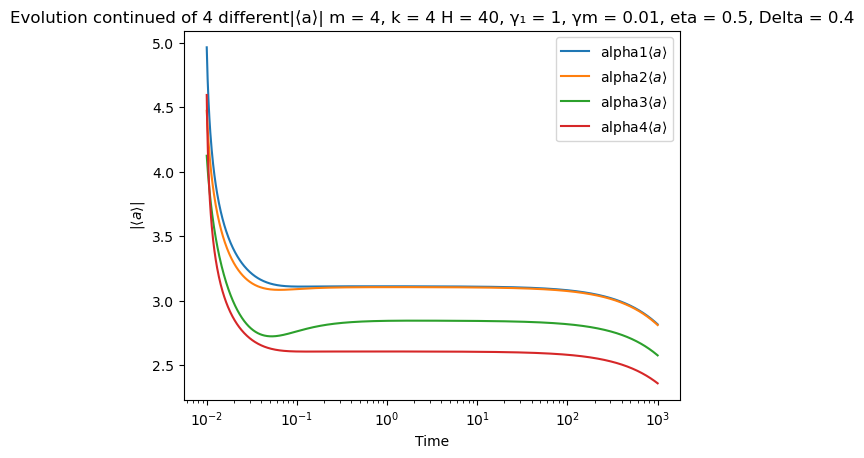

<Figure size 640x480 with 0 Axes>

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import random 
import scipy
from scipy.linalg import expm, sinm, cosm
from qutip import *
from scipy.integrate import solve_ivp

# Defining the system
k = 4 # k-order squeezing drive 
m = 4 # Multiphoton damping
systemSize = 40 # Truncated Hilbert space 

#Defining operators 
a = qt.destroy(systemSize) # Lowering operator
aM = a**m 

aDagger = qt.create(systemSize) # Raising operator 
aDaggerM = aDagger**m

n_hat = aDagger* a # Number operator 
M_joint = (aDagger**m)*(a**m) # Combination of raising/lowering operators 
identity = qt.qeye(systemSize) # Identity operator 

# Defining parameters 
gamma1 = 1    # Single level decay rate 
gammaM = 0.01 # Multilevel decay rate 
delta = 0.4   # Detuning 
eta = 0.5     # Magnitude of driving
theta = 0     # Phase of driving 
beta = 3


# Defining master equation 



alpha_values = {
    'alpha1': + 4 + (3 * 1j),
    'alpha2': - 4 + (2 * 1j),
    'alpha3': + 4 - (1 * 1j),
    'alpha4': - 4 - (4 * 1j)
}



# List of stationary solution (SS) values
SS_cor = 2.2
SS_values = [- SS_cor - SS_cor*1j, - SS_cor + SS_cor*1j, + SS_cor - SS_cor*1j, + SS_cor + SS_cor*1j]

# Dictionary to store results
results = {}

# Time span for the state evolution
time_list = np.logspace(-2, 3, 1000)


for alpha_name in alpha_values.keys():  # Load in saved data from t = 10^-2 to 10^3 simulation 
    print(f"Loading saved data for {alpha_name}...")

    a_exp_mod_array = [] #Array to store values

    # Load the full set of density matrices from the evolution under master equation
    rho_matrices = np.load(f"raw_evolution_{alpha_name}m = 4, k = 4  H = 40, γ₁ = 1, γm = 0.01, eta = 0.5, Delta = 0.4 t = 0.01 to1000.0.npy")

    for i in range (len(rho_matrices)): # Sweep through all the density matrices saved 
        Qobj_matrix = qt.Qobj(rho_matrices[i]) # Convert each matrix back to a Quantum object (was not saved as one)
        expect_a = qt.expect(a, Qobj_matrix)   # Calculate expectation of a with each matrix 
        a_exp_mod = abs(expect_a)              # Take the magnitude of value 
        a_exp_mod_array.append(a_exp_mod)      # Append it to array storing values 

    
    plt.plot(time_list, a_exp_mod_array, label= f'{alpha_name}' r'$\langle a \rangle$')
    
plt.xlabel('Time')
plt.ylabel(r'|$\langle a \rangle$|')
plt.legend()
plt.xscale('log')  # Since time_list is in logspace
plt.title(f'Evolution continued of 4 different|⟨a⟩| m = {m}, k = {k} H = {systemSize}, γ₁ = {gamma1}, γm = {gammaM}, eta = {eta}, Delta = {delta}')
plt.savefig(f'4 alpha Evolution (t = 10^-2 - 10^3 s) of |<a>| m = {m}, k = {k} H = {systemSize}, γ₁ = {gamma1}, γm = {gammaM}, eta = {eta}, Delta = {delta}.png', bbox_inches='tight')
plt.figure()